In [325]:
import sys
sys.path.append("../src") 
sys.path.append("../data") 


import SDE_class as sde
import importlib
importlib.reload(sde)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import util as util
importlib.reload(util)

<module 'util' from '../src/util.py'>

# グラフの確認

#
term: 満期時刻　step:一度に進む幅　init:初期値

In [326]:
term=1
step=0.01
init=np.array([0.])

In [327]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

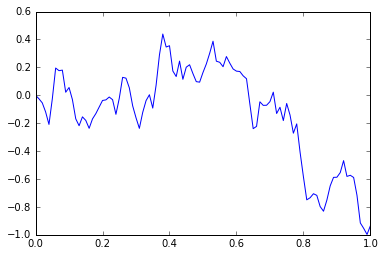

In [328]:
util.simulate("brown_motion",term,step,init)

In [329]:
unkoTraj = np.load("../data/unko.npy") 

In [330]:
term=40
step=0.5

In [331]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [332]:
div=int(term/step)
random_box=np.zeros(div)
for k in range(div):
    value=mymodel.many_step(now_position=np.array([0]))
    random_box[k]=value[0,div-1]
terminal_mean=np.mean(random_box)
terminal_var=np.var(random_box)
print(terminal_mean)#初期値
print(terminal_var)#time^2*myvar^2*myscale

-0.133312021621
43.7480604768


# 独立増分の確認

$$X_t-X_s \amalg X_s$$
$$X_t-X_s \sim N(0,t-s)$$

In [333]:
term=1
step=0.001
div=term/step
init=np.array([0.])
repeat_time=100

In [334]:
time_t=0.05
time_s=0.03

In [335]:
time_t_box=np.zeros(repeat_time)
time_s_box=np.zeros(repeat_time)
time_ts_box=np.zeros(repeat_time)

In [336]:
for k in range(repeat_time):
    many_step = mymodel.many_step_test(now_position=init)
    time_t_box[k]=many_step[0,time_t*div]
    time_s_box[k]=many_step[0,time_s*div]
    time_ts_box[k]=many_step[0,time_t*div]-many_step[0,time_s*div]
var_s=np.var(time_s_box)
var_ts=np.var(time_ts_box)
print(var_s)
print(var_ts)

22.8970384082
17.6421582363


/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [337]:
repeat_time=10000
test=np.zeros(repeat_time)

In [338]:
for k in range(repeat_time):
    test[k]=mymodel.one_step_test(init)
np.var(test)

1.002657989688436